<a href="https://colab.research.google.com/github/zizilnam/Kaggle_Ventilator_Pressure_Prediction/blob/main/VPP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Ventilator Pressure Prediction

/content/drive/MyDrive/Ventilator Pressure Prediction


In [ ]:
# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cudf, cupy
#print('RAPIDS version', cudf.__version__)

In [ ]:
train_df = pd.read_csv("train.csv", index_col=0)
test_df  = pd.read_csv("test.csv", index_col=0)
sample   = pd.read_csv("sample_submission.csv")

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


https://www.kaggle.com/carlmcbrideellis/ventilator-pressure-eda-and-simple-submission

In [ ]:
train_df

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035998,125749,50,10,2.571408,1.558978,1,3.798729


In [ ]:
train_df.nunique().to_frame()

,0
breath_id,75450
R,3
C,3
time_step,3767571
u_in,4020248
u_out,2
pressure,950


In [ ]:
test_df.head(81)

,breath_id,R,C,time_step,u_in,u_out
id,,,,,,
1,0,5,20,0.000000,0.000000,0
2,0,5,20,0.031904,7.515046,0
3,0,5,20,0.063827,14.651675,0
4,0,5,20,0.095751,21.230610,0
5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...
77,0,5,20,2.424070,4.957020,1
78,0,5,20,2.456003,4.963363,1
79,0,5,20,2.487921,4.968767,1


In [ ]:
test_df.nunique().to_frame()

,0
breath_id,50300
R,3
C,3
time_step,2855528
u_in,2787790
u_out,2


하나의 breath_id 당 80개의 time_step을 갖고 있음

In [ ]:
sample.head()

,id,pressure
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
train_df.groupby("breath_id")["time_step"].count().unique().item()

80

In [ ]:
test_df.groupby("breath_id")["time_step"].count().unique().item()

80

결측치는 없음

In [ ]:
train_df.isnull().sum(axis=0).to_frame()

,0
breath_id,0
R,0
C,0
time_step,0
u_in,0
u_out,0
pressure,0


## Time

train_df에서 가장 큰 time_step은 2.9372379779815674초다.

In [ ]:
train_df.time_step.max()

2.9372379779815674

u_out이 0일 때 time_step의 최대값은 0.999798059463501초다.

In [ ]:
train_df[train_df["u_out"] == 0].time_step.max()

0.999798059463501

역시 u_out이 1일 때 time_step의 가장 큰 값은 전체 time_step의 최대값이다.

In [ ]:
train_df[train_df["u_out"] == 1].time_step.max()

2.9372379779815674

The first Breath

In [ ]:
breath_one = train_df[train_df["breath_id"] == 1].reset_index(drop=True)
breath_one

,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,1,20,50,0.033652,18.383041,0,5.907794
2,1,20,50,0.067514,22.509278,0,7.876254
3,1,20,50,0.101542,22.808822,0,11.742872
4,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
75,1,20,50,2.553593,4.974474,1,6.399909
76,1,20,50,2.587754,4.978481,1,6.610815
77,1,20,50,2.621773,4.981847,1,6.329607
78,1,20,50,2.655746,4.984683,1,6.540513


In [ ]:
breath_one.nunique().to_frame()

,0
breath_id,1
R,1
C,1
time_step,80
u_in,66
u_out,2
pressure,55


Breath_id는 개인 한명을 의미하는 것으로 보인다. 폐의 상태(특징)를 나타내는 데이터인 R과 C의 unique_value가 하나 밖에 없기 떄문이다.

u_in은 들이쉬는 공기를 가리키는 것으로 보이고

U_out은 공기를 내쉬는 지 안 내쉬는 지를 나타내는 것으로 보인다.

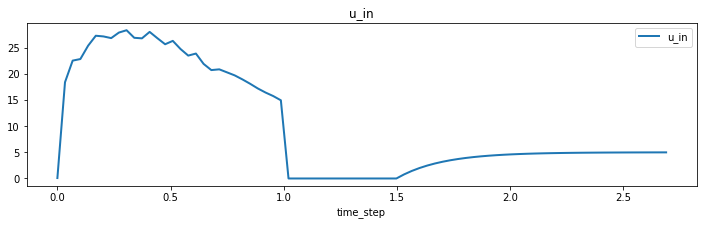

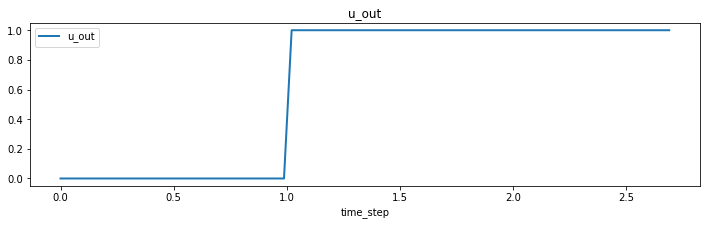

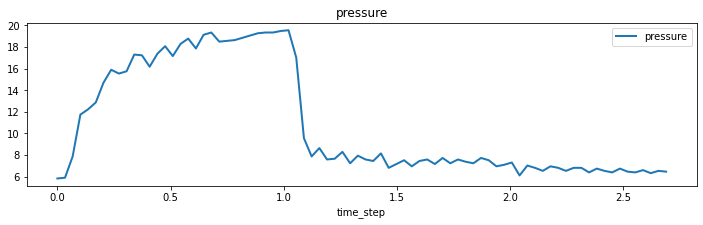

In [ ]:
breath_one.plot(x="time_step", y="u_in", kind="line", figsize=(12,3), lw=2, title="u_in")
breath_one.plot(x="time_step", y="u_out", kind="line", figsize=(12,3), lw=2, title="u_out")
breath_one.plot(x="time_step", y="pressure", kind="line", figsize=(12,3), lw=2, title="pressure")

# All_breath

https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/276599

R은 폐에서 공기가 나오기 전에(숨을 내쉬기 전) 저항하는 정도를 나타낸다.

가장 큰 R인 50은 저항이 가장 크므로 들이 쉬는 것을 멈출 때 기압이 가장 크고

가장 작은 R인 5는 저항이 가장 작으므로 들이쉬는 것을 멈출 때 기압이 가장 작다.

숨을 들이쉬고 내쉬기 전 숨을 멈출 때 숨을 잘 가둬놓는 breath_id의 pressure는 쉽게 높아지고

잘 가둬놓지 못하는 breath_id의 preassure는 쉽게 낮아진다.

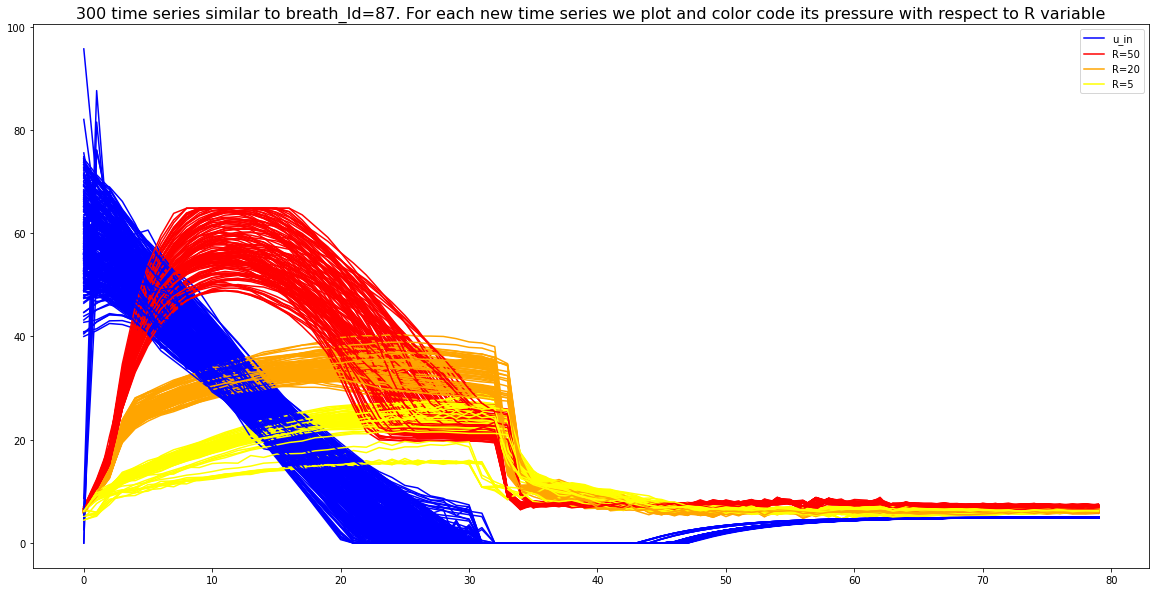

In [ ]:
train_df.R.value_counts().to_frame()

,R
50,2410080
5,1988800
20,1637120


C는 폐가 얼마나 잘 늘어나는지를 알려준다. 

가장 작은 C인 10일 때 가장 압력이 강해서 가장 잘 늘어나지 않고

가장 큰 C인 50일 때 가장 압력이 약하므로 가장 잘 늘어난다.

그 이유는 공기가 유입될 때, 폐가 잘 늘어난다면(풍선처럼 폐가 커진다면) 기압이 쉽게 커지지 않고

폐가 잘 늘어나지 않는다면, 기압이 쉽게 커지기 때문이다.

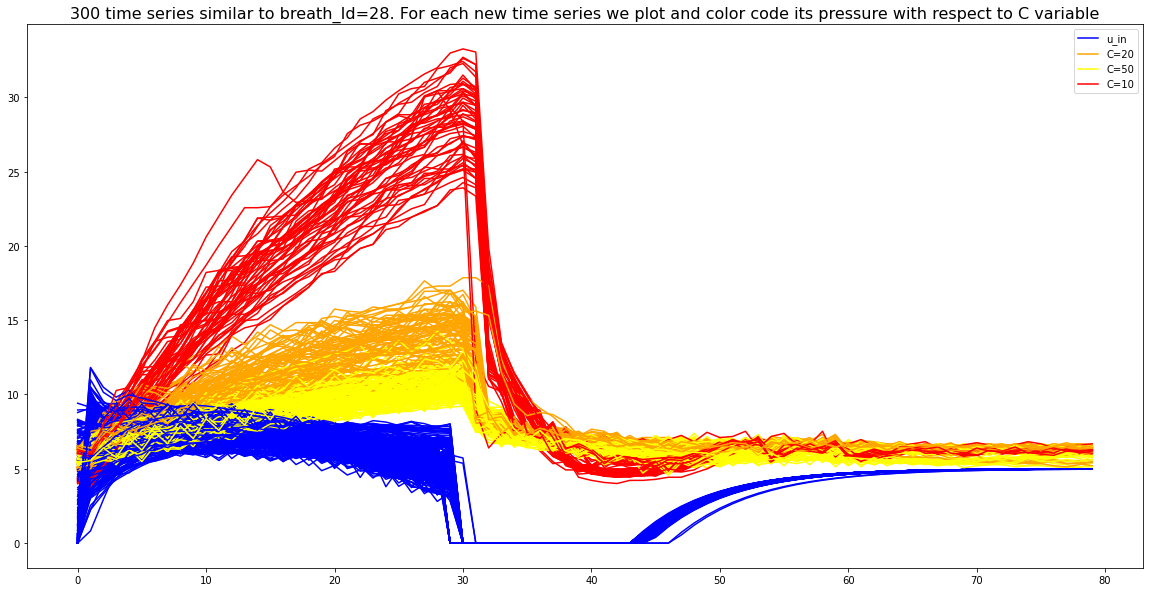

In [ ]:
train_df.C.value_counts().to_frame()

,C
10,2244720
50,1971680
20,1819600


In [ ]:
train_df.u_out.value_counts().to_frame()

,u_out
1,3745032
0,2290968


# Pressure

pressure의 최대값은 64 cmh20다.

In [ ]:
train_df.pressure.max()

64.82099173863949

pressure 값이 한곳에 집중되어있다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


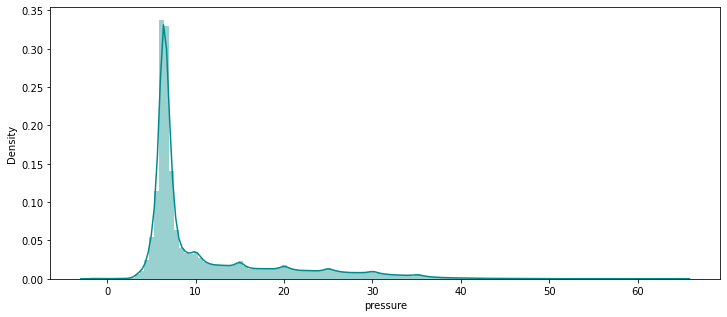

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.distplot(train_df['pressure'],
                  bins=120,
                  color='darkcyan')

In [ ]:
train_df.pressure.median()

7.032628177739799

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


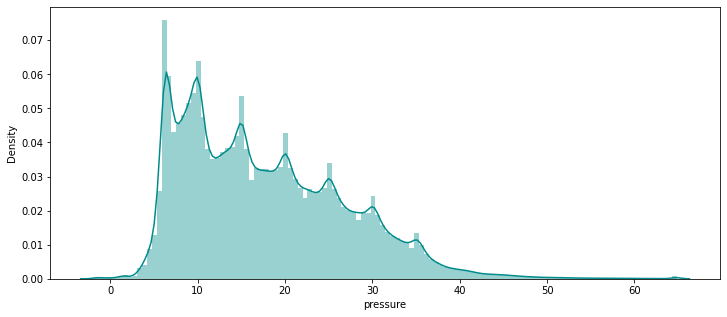

In [ ]:
u_out_zero = train_df[train_df['u_out']==0].reset_index(drop=True)
plt.figure(figsize=(12,5))
ax = sns.distplot(u_out_zero['pressure'],
                  bins=120,
                  color='darkcyan')

In [ ]:
u_out_zero.pressure.median()

15.820396359141819

In [ ]:
print(train_df[train_df["C"]==10][train_df["R"]==5].breath_id.min())
print(train_df[train_df["C"]==10][train_df["R"]==20].breath_id.min())
print(train_df[train_df["C"]==10][train_df["R"]==50].breath_id.min())
print(train_df[train_df["C"]==20][train_df["R"]==5].breath_id.min())
print(train_df[train_df["C"]==20][train_df["R"]==20].breath_id.min())
print(train_df[train_df["C"]==20][train_df["R"]==50].breath_id.min())
print(train_df[train_df["C"]==50][train_df["R"]==5].breath_id.min())
print(train_df[train_df["C"]==50][train_df["R"]==20].breath_id.min())
print(train_df[train_df["C"]==50][train_df["R"]==50].breath_id.min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


39
21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


18
17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


5
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


4


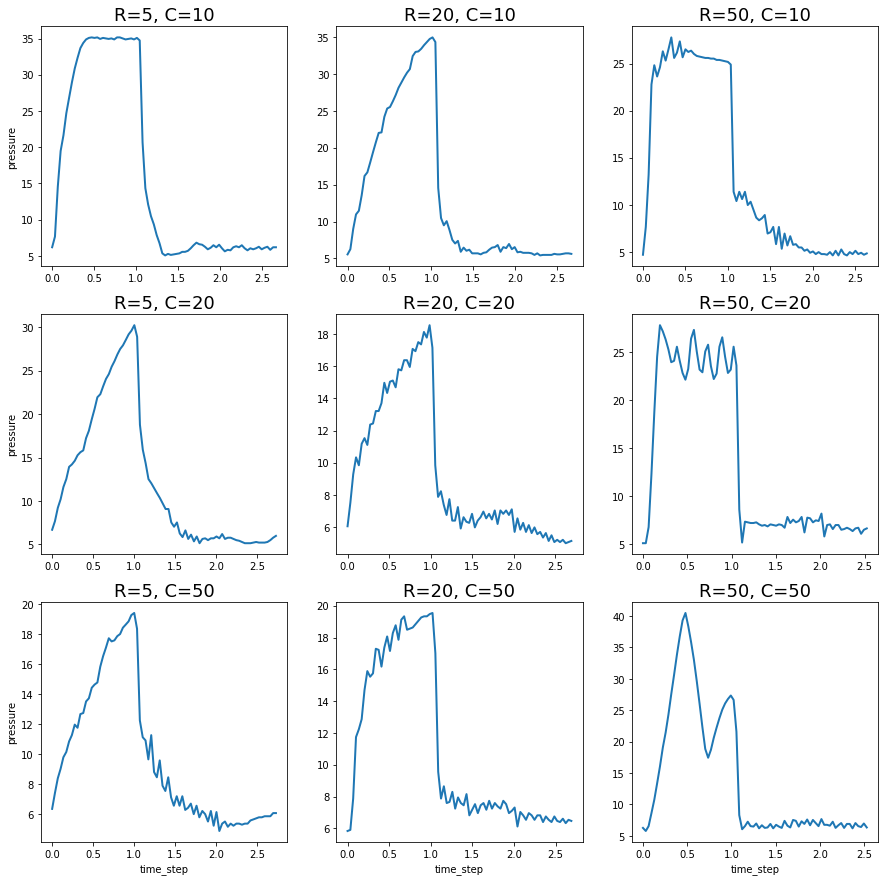

In [ ]:
breath_2 = train_df.query('breath_id == 2').reset_index(drop = True)
breath_3 = train_df.query('breath_id == 3').reset_index(drop = True)
breath_4 = train_df.query('breath_id == 4').reset_index(drop = True)
breath_5 = train_df.query('breath_id == 5').reset_index(drop = True)
breath_17 = train_df.query('breath_id == 17').reset_index(drop = True)
breath_18 = train_df.query('breath_id == 18').reset_index(drop = True)
breath_21 = train_df.query('breath_id == 21').reset_index(drop = True)
breath_39 = train_df.query('breath_id == 39').reset_index(drop = True)

fig, axes = plt.subplots(3,3,figsize=(15,15))
sns.lineplot(data=breath_39, x="time_step", y="pressure", lw=2, ax=axes[0,0])
axes[0,0].set_title ("R=5, C=10", fontsize=18)
axes[0,0].set(xlabel='')
#axes[0,0].set(ylim=(0, None))
sns.lineplot(data=breath_21, x="time_step", y="pressure",  lw=2, ax=axes[0,1])
axes[0,1].set_title ("R=20, C=10", fontsize=18)
axes[0,1].set(xlabel='')
axes[0,1].set(ylabel='')
#axes[0,1].set(ylim=(0, None))
sns.lineplot(data=breath_18, x="time_step", y="pressure",  lw=2,ax=axes[0,2])
axes[0,2].set_title ("R=50, C=10", fontsize=18)
axes[0,2].set(xlabel='')
axes[0,2].set(ylabel='')
#axes[0,2].set(ylim=(0, None))
sns.lineplot(data=breath_17, x="time_step", y="pressure",  lw=2,ax=axes[1,0])
axes[1,0].set_title ("R=5, C=20", fontsize=18)
axes[1,0].set(xlabel='')
#axes[1,0].set(ylim=(0, None))
sns.lineplot(data=breath_2, x="time_step", y="pressure",  lw=2,ax=axes[1,1])
axes[1,1].set_title ("R=20, C=20", fontsize=18)
axes[1,1].set(xlabel='')
axes[1,1].set(ylabel='')
#axes[1,1].set(ylim=(0, None))
sns.lineplot(data=breath_3, x="time_step", y="pressure",  lw=2,ax=axes[1,2])
axes[1,2].set_title ("R=50, C=20", fontsize=18)
axes[1,2].set(xlabel='')
axes[1,2].set(ylabel='')
#axes[1,2].set(ylim=(0, None))
sns.lineplot(data=breath_5, x="time_step", y="pressure",  lw=2,ax=axes[2,0])
axes[2,0].set_title ("R=5, C=50", fontsize=18)
#axes[2,0].set(ylim=(0, None))
sns.lineplot(data=breath_one, x="time_step", y="pressure",  lw=2,ax=axes[2,1])
axes[2,1].set_title ("R=20, C=50", fontsize=18)
axes[2,1].set(ylabel='')
#axes[2,1].set(ylim=(0, None))
sns.lineplot(data=breath_4, x="time_step", y="pressure",  lw=2,ax=axes[2,2])
axes[2,2].set_title ("R=50, C=50", fontsize=18)
axes[2,2].set(ylabel='')
#axes[2,2].set(ylim=(0, None))

plt.show();

측정이 본격적으로 시작되기 전부터 기압이 존재한다.

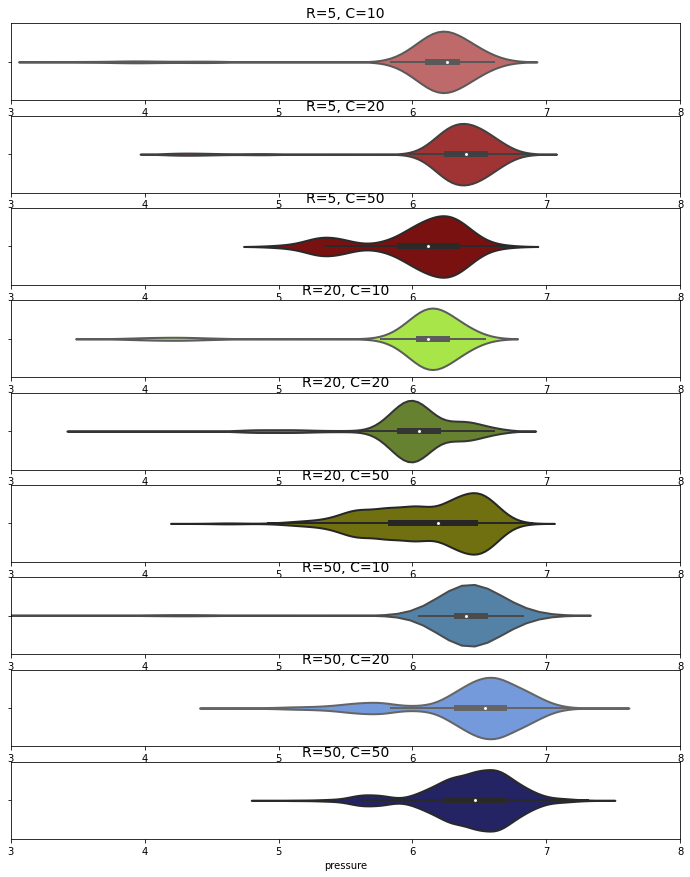

In [ ]:
zero_time = train_df.query("time_step < 0.000001 & u_in < 0.000001").reset_index(drop = True)
zero_time_5_10  = zero_time.query("R ==  5 & C == 10").reset_index(drop = True)
zero_time_5_20  = zero_time.query("R ==  5 & C == 20").reset_index(drop = True)
zero_time_5_50  = zero_time.query("R ==  5 & C == 50").reset_index(drop = True)
zero_time_20_10 = zero_time.query("R == 20 & C == 10").reset_index(drop = True)
zero_time_20_20 = zero_time.query("R == 20 & C == 20").reset_index(drop = True)
zero_time_20_50 = zero_time.query("R == 20 & C == 50").reset_index(drop = True)
zero_time_50_10 = zero_time.query("R == 50 & C == 10").reset_index(drop = True)
zero_time_50_20 = zero_time.query("R == 50 & C == 20").reset_index(drop = True)
zero_time_50_50 = zero_time.query("R == 50 & C == 50").reset_index(drop = True)

fig, axes = plt.subplots(9,1,figsize=(12,15))
sns.violinplot(x=zero_time_5_10["pressure"], linewidth=2, ax=axes[0], color="indianred")
axes[0].set_title ("R=5, C=10", fontsize=14)
axes[0].set(xlim=(3, 8))
sns.violinplot(x=zero_time_5_20["pressure"], linewidth=2, ax=axes[1], color="firebrick")
axes[1].set_title ("R=5, C=20", fontsize=14)
axes[1].set(xlim=(3, 8))
sns.violinplot(x=zero_time_5_50["pressure"], linewidth=2, ax=axes[2], color="darkred" )
axes[2].set_title ("R=5, C=50", fontsize=14)
axes[2].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_10["pressure"], linewidth=2, ax=axes[3], color="greenyellow")
axes[3].set_title ("R=20, C=10", fontsize=14)
axes[3].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_20["pressure"], linewidth=2, ax=axes[4], color="olivedrab")
axes[4].set_title ("R=20, C=20", fontsize=14)
axes[4].set(xlim=(3, 8))
sns.violinplot(x=zero_time_20_50["pressure"], linewidth=2, ax=axes[5], color="olive" )
axes[5].set_title ("R=20, C=50", fontsize=14)
axes[5].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_10["pressure"], linewidth=2, ax=axes[6], color="steelblue")
axes[6].set_title ("R=50, C=10", fontsize=14)
axes[6].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_20["pressure"], linewidth=2, ax=axes[7], color="cornflowerblue")
axes[7].set_title ("R=50, C=20", fontsize=14)
axes[7].set(xlim=(3, 8))
sns.violinplot(x=zero_time_50_50["pressure"], linewidth=2, ax=axes[8], color="midnightblue" )
axes[8].set_title ("R=50, C=50", fontsize=14)
axes[8].set(xlim=(3, 8));

In [ ]:
zero_time["pressure"].mean()

6.268396109353407

# Negative pressure

두 breath_id의 pressure는 음수다. 그리고 둘 다 R = 50, C = 10이다.

In [ ]:
zero_time[zero_time['pressure']==zero_time['pressure'].min()]

,breath_id,R,C,time_step,u_in,u_out,pressure
114,542,50,10,0.0,0.0,0,-1.825442
21863,119582,50,10,0.0,0.0,0,-1.825442


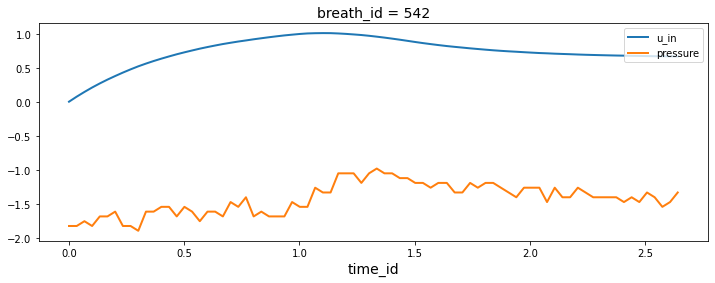

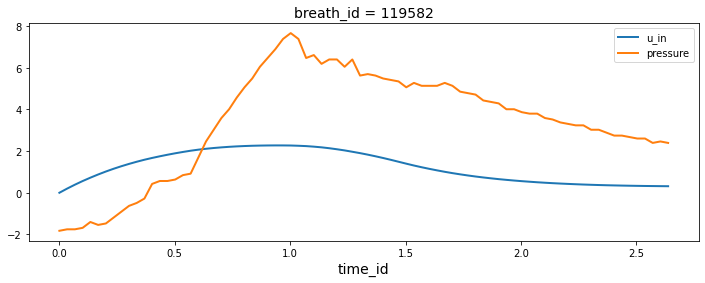

In [ ]:
breath_542 = train_df.query('breath_id == 542').reset_index(drop = True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(breath_542["time_step"],breath_542["u_in"], lw=2, label='u_in')
ax.plot(breath_542["time_step"],breath_542["pressure"], lw=2, label='pressure')
#ax.set(xlim=(0,1))
ax.legend(loc="upper right")
ax.set_xlabel("time_id", fontsize=14)
ax.set_title("breath_id = 542", fontsize=14)
plt.show();

breath_119582 = train_df.query('breath_id == 119582').reset_index(drop = True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(breath_119582["time_step"],breath_119582["u_in"], lw=2, label='u_in')
ax.plot(breath_119582["time_step"],breath_119582["pressure"], lw=2, label='pressure')
#ax.set(xlim=(0,1))
ax.legend(loc="upper right")
ax.set_xlabel("time_id", fontsize=14)
ax.set_title("breath_id = 119582", fontsize=14)
plt.show();

# Feature Engineer


https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/273974

폐의 pressure는 폐에 얼머나 공기가 들어가느냐와 큰 연관이 있기 때문에 u_in의 누적합은 pressure와 큰 연관이 있을 수 있다.

In [ ]:
train_df['u_in_cumsum'] = (train_df['u_in']).groupby(train_df['breath_id']).cumsum()
test_df['u_in_cumsum']  = (test_df['u_in']).groupby(test_df['breath_id']).cumsum()

u_in과 pressure 사이의 시차가 0.1초 정도 나는 것으로 예측할 수 있다.

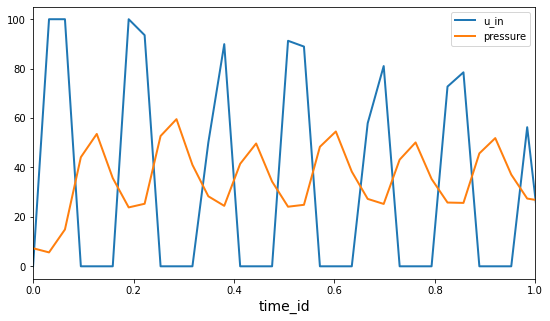

In [ ]:
breath_928 = train_df.query('breath_id == 928').reset_index(drop = True)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(breath_928["time_step"],breath_928["u_in"], lw=2, label='u_in')
ax.plot(breath_928["time_step"],breath_928["pressure"], lw=2, label='pressure')
ax.set(xlim=(0,1))
ax.legend(loc="upper right")
ax.set_xlabel("time_id", fontsize=14)
plt.show();

In [ ]:
train_df['u_in_shifted'] = train_df.groupby('breath_id')['u_in'].shift(2).fillna(method="backfill")
test_df['u_in_shifted']  = test_df.groupby('breath_id')['u_in'].shift(2).fillna(method="backfill")

In [ ]:
for df in (train_df, test_df):
    df['u_in_first']  = df.groupby('breath_id')['u_in'].transform('first')
    df['u_in_min']    = df.groupby('breath_id')['u_in'].transform('min')
    df['u_in_mean']   = df.groupby('breath_id')['u_in'].transform('mean')
    df['u_in_median'] = df.groupby('breath_id')['u_in'].transform('median')
    df['u_in_max']    = df.groupby('breath_id')['u_in'].transform('max')
    df['u_in_last']   = df.groupby('breath_id')['u_in'].transform('last')

In [ ]:
train_df

,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_cumsum,u_in_shifted,u_in_first,u_in_min,u_in_mean,u_in_median,u_in_max,u_in_last
id,,,,,,,,,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492,0.083334,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
2,1,20,50,0.033652,18.383041,0,5.907794,18.466375,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
3,1,20,50,0.067514,22.509278,0,7.876254,40.975653,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
4,1,20,50,0.101542,22.808822,0,11.742872,63.784476,18.383041,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
5,1,20,50,0.135756,25.355850,0,12.234987,89.140326,22.509278,0.083334,0.0,10.146007,4.922568,28.313036,4.987079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035996,125749,50,10,2.504603,1.489714,1,3.869032,387.109297,1.353205,6.030572,0.0,4.911402,1.694180,25.504196,1.482739
6035997,125749,50,10,2.537961,1.488497,1,3.869032,388.597794,1.420711,6.030572,0.0,4.911402,1.694180,25.504196,1.482739
6035998,125749,50,10,2.571408,1.558978,1,3.798729,390.156772,1.489714,6.030572,0.0,4.911402,1.694180,25.504196,1.482739


In [ ]:
# rewritten calculation of lag features from this notebook: https://www.kaggle.com/patrick0302/add-lag-u-in-as-new-feat
# some of ideas from this notebook: https://www.kaggle.com/mst8823/google-brain-lightgbm-baseline
train_df['last_value_u_in'] = train_df.groupby('breath_id')['u_in'].transform('last')
train_df['u_in_lag1'] = train_df.groupby('breath_id')['u_in'].shift(1)
train_df['u_out_lag1'] = train_df.groupby('breath_id')['u_out'].shift(1)
train_df['u_in_lag_back1'] = train_df.groupby('breath_id')['u_in'].shift(-1)
train_df['u_out_lag_back1'] = train_df.groupby('breath_id')['u_out'].shift(-1)
train_df['u_in_lag2'] = train_df.groupby('breath_id')['u_in'].shift(2)
train_df['u_out_lag2'] = train_df.groupby('breath_id')['u_out'].shift(2)
train_df['u_in_lag_back2'] = train_df.groupby('breath_id')['u_in'].shift(-2)
train_df['u_out_lag_back2'] = train_df.groupby('breath_id')['u_out'].shift(-2)
train_df['u_in_lag3'] = train_df.groupby('breath_id')['u_in'].shift(3)
train_df['u_out_lag3'] = train_df.groupby('breath_id')['u_out'].shift(3)
train_df['u_in_lag_back3'] = train_df.groupby('breath_id')['u_in'].shift(-3)
train_df['u_out_lag_back3'] = train_df.groupby('breath_id')['u_out'].shift(-3)
train_df = train_df.fillna(0)


train_df['R__C'] = train_df["R"].astype(str) + '__' + train_df["C"].astype(str)

# max value of u_in and u_out for each breath
train_df['breath_id__u_in__max'] = train_df.groupby(['breath_id'])['u_in'].transform('max')
train_df['breath_id__u_out__max'] = train_df.groupby(['breath_id'])['u_out'].transform('max')

# difference between consequitive values
train_df['u_in_diff1'] = train_df['u_in'] - train_df['u_in_lag1']
train_df['u_out_diff1'] = train_df['u_out'] - train_df['u_out_lag1']
train_df['u_in_diff2'] = train_df['u_in'] - train_df['u_in_lag2']
train_df['u_out_diff2'] = train_df['u_out'] - train_df['u_out_lag2']
# from here: https://www.kaggle.com/yasufuminakama/ventilator-pressure-lstm-starter
train_df.loc[train_df['time_step'] == 0, 'u_in_diff'] = 0
train_df.loc[train_df['time_step'] == 0, 'u_out_diff'] = 0

# difference between the current value of u_in and the max value within the breath
train_df['breath_id__u_in__diffmax'] = train_df.groupby(['breath_id'])['u_in'].transform('max') - train_df['u_in']
train_df['breath_id__u_in__diffmean'] = train_df.groupby(['breath_id'])['u_in'].transform('mean') - train_df['u_in']

# OHE
train_df = train_df.merge(pd.get_dummies(train_df['R'], prefix='R'), left_index=True, right_index=True).drop(['R'], axis=1)
train_df = train_df.merge(pd.get_dummies(train_df['C'], prefix='C'), left_index=True, right_index=True).drop(['C'], axis=1)
train_df = train_df.merge(pd.get_dummies(train_df['R__C'], prefix='R__C'), left_index=True, right_index=True).drop(['R__C'], axis=1)

# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/273974
train_df['time_step_cumsum'] = train_df.groupby(['breath_id'])['time_step'].cumsum()

In [ ]:
# all the same for the test data
test_df['last_value_u_in'] = test_df.groupby('breath_id')['u_in'].transform('last')
test_df['u_in_lag1'] = test_df.groupby('breath_id')['u_in'].shift(1)
test_df['u_out_lag1'] = test_df.groupby('breath_id')['u_out'].shift(1)
test_df['u_in_lag_back1'] = test_df.groupby('breath_id')['u_in'].shift(-1)
test_df['u_out_lag_back1'] = test_df.groupby('breath_id')['u_out'].shift(-1)
test_df['u_in_lag2'] = test_df.groupby('breath_id')['u_in'].shift(2)
test_df['u_out_lag2'] = test_df.groupby('breath_id')['u_out'].shift(2)
test_df['u_in_lag_back2'] = test_df.groupby('breath_id')['u_in'].shift(-2)
test_df['u_out_lag_back2'] = test_df.groupby('breath_id')['u_out'].shift(-2)
test_df['u_in_lag3'] = test_df.groupby('breath_id')['u_in'].shift(3)
test_df['u_out_lag3'] = test_df.groupby('breath_id')['u_out'].shift(3)
test_df['u_in_lag_back3'] = test_df.groupby('breath_id')['u_in'].shift(-3)
test_df['u_out_lag_back3'] = test_df.groupby('breath_id')['u_out'].shift(-3)
test_df = test_df.fillna(0)
test_df['R__C'] = test_df["R"].astype(str) + '__' + test_df["C"].astype(str)

test_df['breath_id__u_in__max'] = test_df.groupby(['breath_id'])['u_in'].transform('max')
test_df['breath_id__u_out__max'] = test_df.groupby(['breath_id'])['u_out'].transform('max')

test_df['u_in_diff1'] = test_df['u_in'] - test_df['u_in_lag1']
test_df['u_out_diff1'] = test_df['u_out'] - test_df['u_out_lag1']
test_df['u_in_diff2'] = test_df['u_in'] - test_df['u_in_lag2']
test_df['u_out_diff2'] = test_df['u_out'] - test_df['u_out_lag2']
test_df.loc[test_df['time_step'] == 0, 'u_in_diff'] = 0
test_df.loc[test_df['time_step'] == 0, 'u_out_diff'] = 0

test_df['breath_id__u_in__diffmax'] = test_df.groupby(['breath_id'])['u_in'].transform('max') - test_df['u_in']
test_df['breath_id__u_in__diffmean'] = test_df.groupby(['breath_id'])['u_in'].transform('mean') - test_df['u_in']

test_df = test_df.merge(pd.get_dummies(test_df['R'], prefix='R'), left_index=True, right_index=True).drop(['R'], axis=1)
test_df = test_df.merge(pd.get_dummies(test_df['C'], prefix='C'), left_index=True, right_index=True).drop(['C'], axis=1)
test_df = test_df.merge(pd.get_dummies(test_df['R__C'], prefix='R__C'), left_index=True, right_index=True).drop(['R__C'], axis=1)

test_df['time_step_cumsum'] = test_df.groupby(['breath_id'])['time_step'].cumsum()

In [ ]:
train_df.to_csv('first_processed_train_df.csv')
test_df.to_csv('first_processed_test_df.csv')

In [ ]:
train_df


,breath_id,time_step,u_in,u_out,pressure,u_in_cumsum,u_in_shifted,u_in_first,u_in_min,u_in_mean,u_in_median,u_in_max,u_in_last,last_value_u_in,u_in_lag1,u_out_lag1,u_in_lag_back1,u_out_lag_back1,u_in_lag2,u_out_lag2,u_in_lag_back2,u_out_lag_back2,u_in_lag3,u_out_lag3,u_in_lag_back3,u_out_lag_back3,breath_id__u_in__max,breath_id__u_out__max,u_in_diff1,u_out_diff1,u_in_diff2,u_out_diff2,u_in_diff,u_out_diff,breath_id__u_in__diffmax,breath_id__u_in__diffmean,R_5,R_20,R_50,C_10,C_20,C_50,R__C_20__10,R__C_20__20,R__C_20__50,R__C_50__10,R__C_50__20,R__C_50__50,R__C_5__10,R__C_5__20,R__C_5__50,time_step_cumsum
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.000000,0.083334,0,5.837492,0.083334,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079,4.987079,0.000000,0.0,18.383041,0.0,0.000000,0.0,22.509278,0.0,0.000000,0.0,22.808822,0.0,28.313036,1,0.083334,0.0,0.083334,0.0,0.0,0.0,28.229702,10.062673,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.000000
2,1,0.033652,18.383041,0,5.907794,18.466375,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079,4.987079,0.083334,0.0,22.509278,0.0,0.000000,0.0,22.808822,0.0,0.000000,0.0,25.355850,0.0,28.313036,1,18.299707,0.0,18.383041,0.0,NaN,NaN,9.929994,-8.237035,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.033652
3,1,0.067514,22.509278,0,7.876254,40.975653,0.083334,0.083334,0.0,10.146007,4.922568,28.313036,4.987079,4.987079,18.383041,0.0,22.808822,0.0,0.083334,0.0,25.355850,0.0,0.000000,0.0,27.259866,0.0,28.313036,1,4.126236,0.0,22.425944,0.0,NaN,NaN,5.803758,-12.363271,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.101167
4,1,0.101542,22.808822,0,11.742872,63.784476,18.383041,0.083334,0.0,10.146007,4.922568,28.313036,4.987079,4.987079,22.509278,0.0,25.355850,0.0,18.383041,0.0,27.259866,0.0,0.083334,0.0,27.127486,0.0,28.313036,1,0.299544,0.0,4.425781,0.0,NaN,NaN,5.504214,-12.662816,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.202709
5,1,0.135756,25.355850,0,12.234987,89.140326,22.509278,0.083334,0.0,10.146007,4.922568,28.313036,4.987079,4.987079,22.808822,0.0,27.259866,0.0,22.509278,0.0,27.127486,0.0,18.383041,0.0,26.807732,0.0,28.313036,1,2.547028,0.0,2.846573,0.0,NaN,NaN,2.957185,-15.209844,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.338464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035996,125749,2.504603,1.489714,1,3.869032,387.109297,1.353205,6.030572,0.0,4.911402,1.694180,25.504196,1.482739,1.482739,1.420711,1.0,1.488497,1.0,1.353205,1.0,1.558978,1.0,1.357586,1.0,1.272663,1.0,25.504196,1,0.069002,0.0,0.136509,0.0,NaN,NaN,24.014482,3.421689,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,95.147046
6035997,125749,2.537961,1.488497,1,3.869032,388.597794,1.420711,6.030572,0.0,4.911402,1.694180,25.504196,1.482739,1.482739,1.489714,1.0,1.558978,1.0,1.420711,1.0,1.272663,1.0,1.353205,1.0,1.482739,1.0,25.504196,1,-0.001217,0.0,0.067785,0.0,NaN,NaN,24.015699,3.422905,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,97.685006
6035998,125749,2.571408,1.558978,1,3.798729,390.156772,1.489714,6.030572,0.0,4.911402,1.694180,25.504196,1.482739,1.482739,1.488497,1.0,1.272663,1.0,1.489714,1.0,1.482739,1.0,1.420711,1.0,0.000000,0.0,25.504196,1,0.070481,0.0,0.069264,0.0,NaN,NaN,23.945218,3.352424,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,100.256414
